In [4]:
from ecg_noise_factory.noise import NoiseFactory

In [5]:
nf = NoiseFactory(
    data_path='/local/home/bamorel/my_ecg_ptbxl_benchmarking/ecg_noise/data',
    sampling_rate=100,
    config_path='/local/home/bamorel/my_ecg_ptbxl_benchmarking/ecg_noise/configs/default.yaml',
    mode='all'
)

In [9]:
import numpy as np
clean_ecg = np.load('../data/ptbxl/raw100.npy', allow_pickle=True)  # shape (N, C, L)
clean_ecg = clean_ecg[:100, :, :]  # first 50s of lead I
noisy_ecg = nf.add_noise(clean_ecg, batch_axis=0, channel_axis=2, length_axis=1)

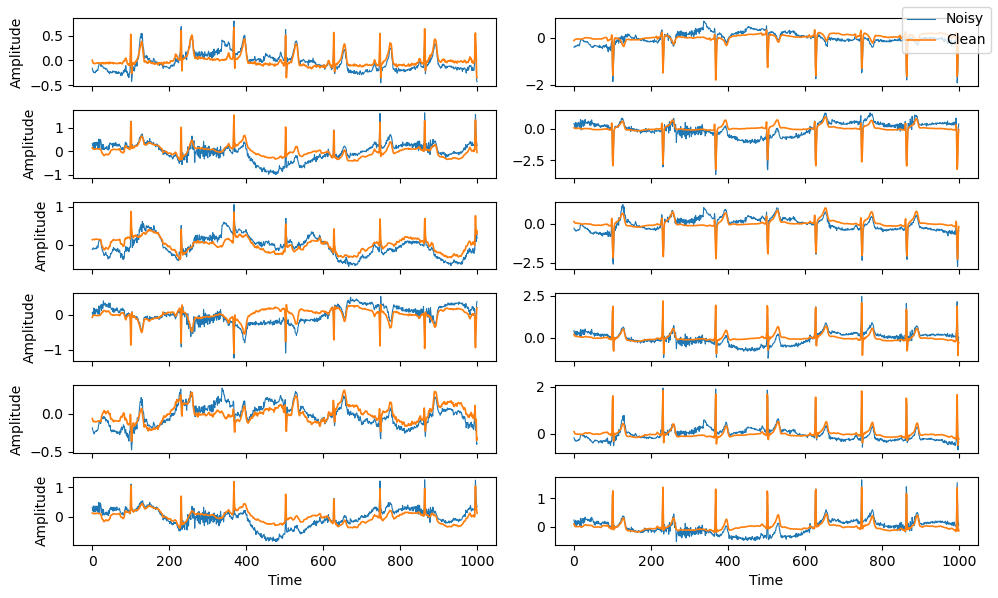

In [10]:
sample_idx = 1  # index of the sample to plot

import matplotlib.pyplot as plt

fig, axs = plt.subplots(6, 2, figsize=(10, 6), sharex=True)

for i in range(6):
    for j in range(2):
        channel = i if j == 0 else i + 6
        # Plot noisy first, clean second (so clean is on top)
        axs[i, j].plot(noisy_ecg[sample_idx, :, channel], lw=0.8, label="Noisy" if (i==0 and j==0) else "")
        axs[i, j].plot(clean_ecg[sample_idx, :, channel], lw=1.2, label="Clean" if (i==0 and j==0) else "")

for ax in axs[-1, :]:
    ax.set_xlabel("Time")

for i in range(6):
    axs[i, 0].set_ylabel("Amplitude")

fig.legend(["Noisy", "Clean"], loc="upper right")
plt.tight_layout()
plt.show()